# Databases

## SQL with SQLite

Goal: Using functions, modularize the following code to run in one cell and then ask your friendly AI assitant to explain everything. Paste the explaination in a new cell following the modularized code.

In [ ]:
# import sqlite3

# connection = sqlite3.connect('looneylms.db') # sqlite will create looneylms.db if it doesn't exist,
#                                              # a file now in the same folder as this file
# cursor = connection.cursor()
# print(connection.total_changes)

# # multiline strings in Python can be sorrounded with ''' Multi line text '''
# query = '''
# CREATE TABLE IF NOT EXISTS people (
#     id INTEGER PRIMARY KEY,
#     firstname TEXT,
#     lastname TEXT,
#     year INTEGER
# )
# '''
# cursor.execute(query)

Prompt:

The following code uses SQLite. I would like to show examples of CRUD

In [ ]:
# # --- CREATE (Insert Data) ---
# query_insert = '''
# INSERT INTO people (firstname, lastname, year) VALUES (?, ?, ?)
# '''
# cursor.execute(query_insert, ('Alice', 'Wonderland', 1990))
# cursor.execute(query_insert, ('Bob', 'The Builder', 1985))
# connection.commit()  # Important: Save the changes!

In [ ]:
# # --- READ ---
# query_read = '''
# SELECT * FROM people
# '''
# cursor.execute(query_read)
# rows = cursor.fetchall()
# for row in rows:
#     print(row)



In [ ]:
# # --- UPDATE ---
# query_update = '''
# UPDATE people SET year = ? WHERE firstname = ?
# '''
# cursor.execute(query_update, (1992, 'Alice'))
# connection.commit()



In [ ]:
# # --- READ ---
# query_read = '''
# SELECT * FROM people
# '''
# cursor.execute(query_read)
# rows = cursor.fetchall()
# for row in rows:
#     print(row)


In [ ]:
# # --- DELETE ---
# query_delete = '''
# DELETE FROM people WHERE lastname = ?
# '''
# cursor.execute(query_delete, ('The Builder',))
# connection.commit()



In [ ]:
# # --- READ ---
# query_read = '''
# SELECT * FROM people
# '''
# cursor.execute(query_read)
# rows = cursor.fetchall()
# for row in rows:
#     print(row)


In [ ]:
# # Close Connection
# connection.close()

## NoSQL with TinyDB

In [ ]:
# pip install tinydb

In [ ]:
# from tinydb import TinyDB, Query

# # Create an in-memory database (or a file-based one if you prefer)
# db = TinyDB('data.json')  # In-memory. Use 'data.json' for a file. :memory:
# table = db.table('people')  # Get the 'people' table (creates it if it doesn't exist)

# # --- CREATE ---
# # Insert data
# table.insert({"firstname": "Alice", "lastname": "Wonderland", "year": 1990})
# table.insert({"firstname": "Bob", "lastname": "Builder", "year": 1985})

In [ ]:
# # --- READ ---
# # Read all data
# Person = Query()  # Recommended way to build queries

# all_people = table.all()
# print("All People:", all_people)

# # Read with a query (find Alice)
# alice = table.search(Person.firstname == "Alice")  # Using Query object
# print("Alice:", alice)

# # Read one (get the first person named Bob)
# bob = table.get(Person.firstname == "Bob")
# print("Bob:", bob)

In [ ]:
# # --- UPDATE ---
# # Update a record (update Alice's year)
# table.update({"year": 1992}, Person.firstname == "Alice")

# # Verify the update
# updated_alice = table.search(Person.firstname == "Alice")
# print("Updated Alice:", updated_alice)



In [ ]:
# # --- DELETE ---
# # Remove a record (remove Bob)
# table.remove(Person.lastname == "Builder")

# # Verify the deletion
# remaining_people = table.all()
# print("Remaining People:", remaining_people)



In [ ]:
# # --- Close the database (Important for file-based databases) ---
# db.close()

## ChromaDB

* Colors by Allison

In [ ]:
# pip install chromadb

In [ ]:
# import chromadb
# from chromadb import Client
# from chromadb.utils import embedding_functions

# collection_name = "book_summaries"  # More descriptive collection name
# client = chromadb.Client()

# try:
#     client.delete_collection(name=collection_name)
#     print(f"Collection '{collection_name}' deleted successfully.")
# except ValueError:
#     print(f"Collection '{collection_name}' does not exist. Ok to create")
# except Exception as e:
#     print(f"An error occurred: {e}")

# # Create a collection with the Sentence Transformer embedding function
# collection = client.create_collection(
#     name=collection_name,
#     embedding_function=embedding_functions.SentenceTransformerEmbeddingFunction(
#         model_name="all-MiniLM-L6-v2"  # Specify the model name
#     ),
# )

# # Documents to embed
# documents = [
#     "Alice in Wonderland is about a girl named Alice who falls into a fantastical world filled with peculiar creatures and bizarre situations.",
#     "Bob the Builder is about a construction worker named Bob and his anthropomorphic vehicles who work together to complete building projects."
# ]

# # Add data to the collection
# collection.add(
#     documents=documents,
#     metadatas=[
#         {"genre": "fantasy", "year": 1865, "author": "Lewis Carroll"},  # More metadata for Alice
#         {"genre": "children's", "year": 1998, "author": "Keith Chapman"}   # More metadata for Bob
#     ],
#     ids=["alice_id", "bob_id"]
# )

In [ ]:
# all_data = collection.get()

# # Access the data components
# ids = all_data['ids']
# documents = all_data['documents']
# metadatas = all_data['metadatas']

# # Display each item in the collection
# for i in range(len(ids)):
#     print(f"ID: {ids[i]}")
#     print(f"Document: {documents[i]}")
#     print(f"Metadata: {metadatas[i]}")
#     print("-" * 20)  # Separator for clarity


In [ ]:
# results = collection.query(query_texts=["a children's story about building"], n_results=1)
# print(results)

In [ ]:
# # --- READ ---
# # Get data by ID
# results_by_ids = collection.get(ids=["alice_id"])
# print("Get by ID (Alice):", results_by_ids)

In [ ]:
# # Perform a similarity search
# query_text = "a story about a whimsical adventure"
# results = collection.query(query_texts=[query_text], n_results=1)
# print("Similarity search:", results)


In [ ]:
# # Get all data
# all_data = collection.get()
# print("All data:", all_data)


In [ ]:
# # --- UPDATE ---
# # Update metadata
# collection.update(
#     ids=["bob_id"],
#     metadatas=[{"genre": "children's", "year": 2000, "author": "Keith Chapman"}]  # Updated year
# )
# print("--- Metadata Updated ---")

# # Verify the update
# updated_bob = collection.get(ids=["bob_id"])
# print("Updated Bob:", updated_bob)



In [ ]:
# print("Updated Bob's year:", updated_bob['metadatas'][0]['year'])

In [ ]:
# # --- DELETE ---
# # Delete a document
# collection.delete(ids=["bob_id"])

# # Verify the deletion
# remaining_data = collection.get(ids=["bob_id"])
# print("Remaining data after delete:", remaining_data)

In [ ]:
# all_data = collection.get()

# # Access the data components
# ids = all_data['ids']
# embeddings = all_data['embeddings']
# documents = all_data['documents']
# metadatas = all_data['metadatas']

# # Display each item in the collection
# for i in range(len(ids)):
#     print(f"ID: {ids[i]}")
#     print(f"Document: {documents[i]}")
#     print(f"Metadata: {metadatas[i]}")
#     print("-" * 20)  # Separator for clarity


In [ ]:
# embeds = collection.get(ids=['alice_id'], include=['embeddings'])
# len(embeds['embeddings'][0]), embeds['embeddings']

https://cookbook.chromadb.dev/core/filters

In a vector store, data is typically modeled as a **vector embedding** alongside its original content and **metadata**. This structure allows for both semantic searching and filtered retrieval, which is essential for applications like Retrieval-Augmented Generation (RAG).

### How Data is Modeled

A vector store models data by storing an object for each item, where each object contains three key components:

1.  **The Vector Embedding**: This is a high-dimensional numerical array (a list of numbers) that represents the **semantic meaning** of the document's content. It's generated by an embedding model that maps text (or other data like images and audio) into a vector space. In this space, documents with similar meanings are positioned close to each other. When a user's query is also converted into a vector, the vector store can perform a similarity search to find the most relevant documents by finding the vectors that are closest to the query vector.

2.  **The Original Document Content**: The actual text, image, or other media from which the vector embedding was created. While the vector is used for the search itself, the original content is needed to provide the complete, readable answer to the user's query once the relevant vectors are found.

3.  **The Metadata**: This is a set of structured data that provides additional context about the document. It's stored alongside the vector but is **not** typically part of the vector embedding itself. Metadata allows for powerful filtering and can include things like:
    * **Author** and **date** of creation
    * **Source** or **URL** of the document
    * **Document type** (e.g., "technical manual," "blog post," "legal document")
    * **Tags** or **keywords**
    * **Unique ID** for the document

### Why this Model is Effective

This three-part model is powerful because it combines the strengths of both semantic and structured search.

* **Semantic Search**: The vector embedding enables the system to understand the **context** and **meaning** of a query, even if it doesn't contain exact keywords. For example, a search for "best way to grow tomatoes" would return documents about gardening and tomato cultivation, not just documents containing the exact phrase.

* **Metadata Filtering**: Metadata acts like a traditional database index, allowing you to filter the search space before or after the semantic search. For instance, you could search for documents about "best way to grow tomatoes" but **only** from sources published in 2024. This combination of semantic search and structured filtering provides highly precise and relevant results.

## NetworkX

Nodes with properties:
  Node: Alice, Properties: {'label': 'Person', 'age': 30}
  Node: Bob, Properties: {'label': 'Person', 'age': 35}
  Node: ProjectX, Properties: {'label': 'Project'}

Edges with properties:
  Edge: (Alice, Bob), Properties: {'relationship': 'friends', 'weight': 1.0}
  Edge: (Alice, ProjectX), Properties: {'relationship': 'works_on'}


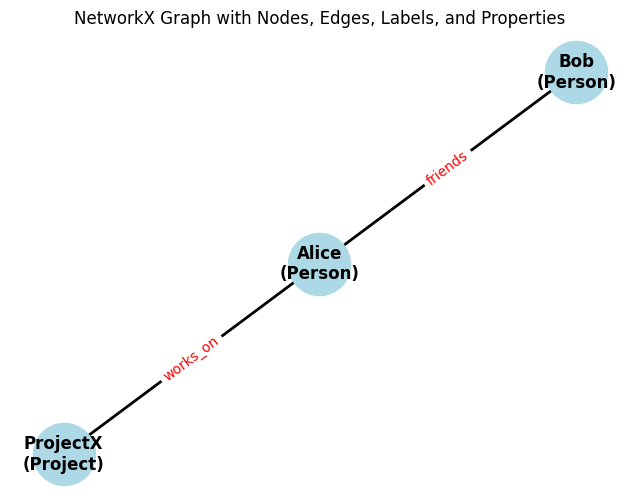

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Create a graph object
G = nx.Graph()

# 2. Add nodes with labels and properties
G.add_node("Alice", label="Person", age=30)
G.add_node("Bob", label="Person", age=35)
G.add_node("ProjectX", label="Project")

# 3. Add edges with properties
G.add_edge("Alice", "Bob", relationship="friends", weight=1.0)
G.add_edge("Alice", "ProjectX", relationship="works_on")

# 4. Display the graph components

# Show a text representation of the nodes, edges, and their properties
print("Nodes with properties:")
for node, data in G.nodes(data=True):
    print(f"  Node: {node}, Properties: {data}")

print("\nEdges with properties:")
for u, v, data in G.edges(data=True):
    print(f"  Edge: ({u}, {v}), Properties: {data}")

# Use a visualization to show the components
pos = nx.spring_layout(G, seed=42)  # For reproducible layout
plt.figure(figsize=(8, 6))

# Get node labels and edge labels from the graph's attributes
node_labels = {node: f'{node}\n({data["label"]})' for node, data in G.nodes(data=True)}
edge_labels = {(u, v): data['relationship'] for u, v, data in G.edges(data=True)}

# Draw the graph elements
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("NetworkX Graph with Nodes, Edges, Labels, and Properties")
plt.axis('off')  # Hide the axis
plt.show()

A graph database stores data using a graph structure, which is a collection of interconnected nodes and edges. It's a type of NoSQL database that's especially useful for managing highly connected data. Unlike traditional relational databases that use tables, graph databases model data as a network of relationships.

**Nodes**, also known as vertices, are the fundamental entities in a graph database. They represent a single unit of data, similar to a row in a relational database or a document in a document store. Nodes can have various properties, which are key-value pairs that describe the node. They can also have labels, which are tags used to group nodes with similar characteristics. For example, in a social network graph, nodes could represent people, places, or companies. A node representing a person might have properties like **`name`**, **`age`**, and **`city`**, and a label like **`:Person`**.

**Edges**, also known as relationships or arcs, are the connections between nodes. They represent how two nodes are related. Each edge has a starting node, an ending node, and a direction. This directionality is crucial as it defines the flow of the relationship. Edges can also have properties, just like nodes. For instance, in a social network graph, an edge could represent a "FRIENDS_WITH" relationship between two **`:Person`** nodes. This edge might have a property like **`since_date`** to indicate when the friendship started.

**Properties** are key-value pairs that provide additional information about a node or an edge. They are used to store data associated with the entities and relationships in the graph. For example, a **`:Movie`** node might have properties such as **`title`**, **`release_year`**, and **`runtime`**. A **`:RATED`** edge between a **`:Person`** and a **`:Movie`** might have a property like **`rating`** to store the star rating given.

**Labels** are used to categorize nodes. They are a way to group nodes that have the same type or role. A single node can have multiple labels. For example, a person might be a **`:User`** and also a **`:Teacher`** in a different context. Labels help to efficiently query the graph and constrain the types of nodes returned in a query.



In [ ]:
import networkx as nx

# Create an empty, undirected graph
G = nx.Graph()

# Create an empty, directed graph
D = nx.DiGraph()


In [ ]:
# CREATE: Add a single node with properties
G.add_node("Alice", label="Person", age=30)

# Add multiple nodes from a list of (node, properties) tuples
nodes_to_add = [
    ("Bob", {"label": "Person", "age": 35}),
    ("ProjectX", {"label": "Project"})
]
G.add_nodes_from(nodes_to_add)
print("Nodes are:", list(G.nodes))


Nodes are: ['Alice', 'Bob', 'ProjectX']


In [ ]:
# Add a single edge with properties
G.add_edge("Alice", "Bob", relationship="friends", since=2023)

# Add multiple edges from a list of (source, target, properties) tuples
edges_to_add = [
    ("Alice", "ProjectX", {"relationship": "works_on", "role": "developer"}),
    ("Bob", "ProjectX", {"relationship": "works_on", "role": "manager"})
]
G.add_edges_from(edges_to_add)
# READ: Get all nodes
print("All nodes:", list(G.nodes))

# Get all edges
print("All edges:", list(G.edges(data=True)))

All nodes: ['Alice', 'Bob', 'ProjectX']
All edges: [('Alice', 'Bob', {'relationship': 'friends', 'since': 2023}), ('Alice', 'ProjectX', {'relationship': 'works_on', 'role': 'developer'}), ('Bob', 'ProjectX', {'relationship': 'works_on', 'role': 'manager'})]


In [ ]:
# READ: Get all nodes
print("All nodes:", G.nodes)

# Get all edges
print("All edges:", G.edges)

# Get properties for a specific node
print("Alice's properties:", G.nodes["Alice"])

# Get properties for a specific edge
print("Edge properties:", G.get_edge_data("Alice", "Bob"))


All nodes: ['Alice', 'Bob', 'ProjectX']
All edges: [('Alice', 'Bob'), ('Alice', 'ProjectX'), ('Bob', 'ProjectX')]
Alice's properties: {'label': 'Person', 'age': 30}
Edge properties: {'relationship': 'friends', 'since': 2023}


In [ ]:
# Find all neighbors of "Alice"
print("Alice's neighbors:", list(G.neighbors("Alice")))

# Check if a specific edge exists
if G.has_edge("Alice", "Bob"):
    print("Alice and Bob are friends.")


Alice's neighbors: ['Bob', 'ProjectX']
Alice and Bob are friends.


In [ ]:
# Update a single property
G.nodes["Alice"]["age"] = 31

# Add a new property
G.nodes["Alice"]["city"] = "New York"

print("Updated Alice's properties:", G.nodes["Alice"])


Updated Alice's properties: {'label': 'Person', 'age': 31, 'city': 'New York'}


In [ ]:
# Update a single edge property
G.get_edge_data("Alice", "Bob")["since"] = 2024

print("Updated edge properties:", G.get_edge_data("Alice", "Bob"))


Updated edge properties: {'relationship': 'friends', 'since': 2024}


In [ ]:
# Delete a single node
G.remove_node("Bob")
print("\nAfter deleting 'Bob', nodes are:", list(G.nodes))
print("Edges are:", list(G.edges)) # Edge between Alice and Bob is also gone



After deleting 'Bob', nodes are: ['Alice', 'ProjectX']
Edges are: [('Alice', 'ProjectX')]


In [ ]:
# Delete a single edge
G.remove_edge("Alice", "ProjectX")
print("After deleting an edge, edges are:", list(G.edges))

# Delete multiple edges from a list
G.remove_edges_from([("Alice", "ProjectX"), ("Bob", "ProjectX")])


After deleting an edge, edges are: []


In [ ]:
# Clear all nodes and edges from the graph
G.clear()
print("Graph cleared. Nodes:", list(G.nodes))
print("Edges:", list(G.edges))


Graph cleared. Nodes: []
Edges: []
